In [ ]:
!pip install pandas numpy matplotlib

In [ ]:
!pip install -U scikit-learn
!pip install --upgrade tensorflow

In [ ]:
!pip install seaborn

In [158]:
from user_agents import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textwrap import wrap
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import OneClassSVM
import joblib

In [2]:
f=open('../../../Downloads/benign/BlueCoat_Large.webgateway')

In [3]:
print(f.readline())

[02/Aug/2011:22:00:00 -0700] "user_1" 0.0.0.0 0.0.0.0  9080 200 TCP_HIT "GET http://games.maktoob.com/smart/gamesCH1/gimages/smart1040.jpeg HTTP/1.0" "unknown"  "low risk" "image/jpeg" 2370 409 "Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.10 (KHTML, like Gecko) Chrome/8.0.552.237 Safari/534.10" "i1.makcdn.com" "-" "0" "" "-"



In [4]:
data =[]
for x in f:
    data.append(x)

In [5]:
f.close()

In [6]:
benign=pd.DataFrame(data)

In [7]:
benign.columns=['user_agent']

In [8]:
benign.head()

,user_agent
0,"[02/Aug/2011:22:00:00 -0700] ""user_2"" 0.0.0.0 ..."
1,"[02/Aug/2011:22:00:00 -0700] ""user_3"" 0.0.0.0 ..."
2,"[02/Aug/2011:22:00:00 -0700] ""user_4"" 0.0.0.0 ..."
3,"[02/Aug/2011:22:00:00 -0700] ""user_5"" 0.0.0.0 ..."
4,"[02/Aug/2011:22:00:00 -0700] ""user_6"" 0.0.0.0 ..."


In [9]:
benign.tail()

,user_agent
1424284,"[02/Aug/2011:23:27:37 -0700] ""user_425"" 0.0.0...."
1424285,"[02/Aug/2011:23:27:37 -0700] ""user_426"" 0.0.0...."
1424286,"[02/Aug/2011:23:27:37 -0700] ""user_427"" 0.0.0...."
1424287,"[02/Aug/2011:23:27:37 -0700] ""user_428"" 0.0.0...."
1424288,"[02/Aug/2011:23:27:37 -0700] ""user_429"" 0.0.0...."


In [10]:
a=parse(benign['user_agent'][3])

In [11]:
str(a)

'Other / Other / Other'

In [12]:
a.browser.family

'Other'

In [92]:
a.ua_string

'[02/Aug/2011:22:00:00 -0700] "user_5" 0.0.0.0 0.0.0.0  9080 0 TCP_ERR_MISS "unknown -/ HTTP/1.0" "unknown"  "low risk" "-" 0 35 "-" "-" "-" "0" "" "-"\n'

In [15]:
benign['timestamp']=benign['user_agent'].apply(lambda x: re.findall(r'^\[(.+?)\]',x)[0])

In [16]:
benign['timestamp_obj']=benign['timestamp'].apply(lambda x:pd.to_datetime(x,format='%d/%b/%Y:%H:%M:%S -0700',errors='coerce'))

In [17]:
benign.isnull().sum()

user_agent       0
timestamp        0
timestamp_obj    0
dtype: int64

In [18]:
benign['timestamp_obj'].max(),benign['timestamp_obj'].min()

(Timestamp('2011-08-02 23:27:37'), Timestamp('2011-08-02 22:00:00'))

In [19]:
benign['min']=benign['timestamp_obj'].apply(lambda x:(x.hour,x.minute))

In [20]:
benign.head()

,user_agent,timestamp,timestamp_obj,min
0,"[02/Aug/2011:22:00:00 -0700] ""user_2"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
1,"[02/Aug/2011:22:00:00 -0700] ""user_3"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
2,"[02/Aug/2011:22:00:00 -0700] ""user_4"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
3,"[02/Aug/2011:22:00:00 -0700] ""user_5"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
4,"[02/Aug/2011:22:00:00 -0700] ""user_6"" 0.0.0.0 ...",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"


In [21]:
grouped_benign=benign.groupby('min', group_keys=False)

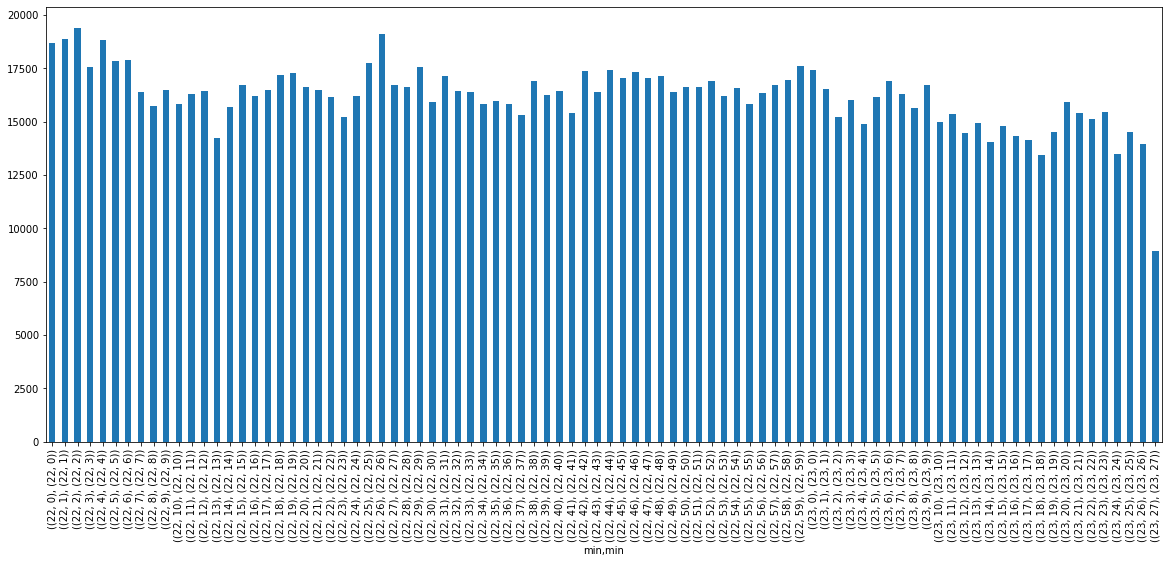

In [22]:
plt.figure(figsize=(20,8))
grouped_benign['min'].value_counts().plot(kind='bar')

In [23]:
sample=grouped_benign.apply(lambda x: x.sample(frac=0.005)).reset_index()

In [24]:
sample

,index,user_agent,timestamp,timestamp_obj,min
0,4351,"[02/Aug/2011:22:00:15 -0700] ""user_353"" 0.0.0....",02/Aug/2011:22:00:15 -0700,2011-08-02 22:00:15,"(22, 0)"
1,13740,"[02/Aug/2011:22:00:44 -0700] ""user_242"" 0.0.0....",02/Aug/2011:22:00:44 -0700,2011-08-02 22:00:44,"(22, 0)"
2,105,"[02/Aug/2011:22:00:00 -0700] ""user_107"" 0.0.0....",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)"
3,5487,"[02/Aug/2011:22:00:19 -0700] ""user_489"" 0.0.0....",02/Aug/2011:22:00:19 -0700,2011-08-02 22:00:19,"(22, 0)"
4,2861,"[02/Aug/2011:22:00:10 -0700] ""user_363"" 0.0.0....",02/Aug/2011:22:00:10 -0700,2011-08-02 22:00:10,"(22, 0)"
...,...,...,...,...,...
7117,1419533,"[02/Aug/2011:23:27:16 -0700] ""user_174"" 0.0.0....",02/Aug/2011:23:27:16 -0700,2011-08-02 23:27:16,"(23, 27)"
7118,1417352,"[02/Aug/2011:23:27:07 -0700] ""user_493"" 0.0.0....",02/Aug/2011:23:27:07 -0700,2011-08-02 23:27:07,"(23, 27)"
7119,1422047,"[02/Aug/2011:23:27:28 -0700] ""user_188"" 0.0.0....",02/Aug/2011:23:27:28 -0700,2011-08-02 23:27:28,"(23, 27)"
7120,1422930,"[02/Aug/2011:23:27:32 -0700] ""user_71"" 0.0.0.0...",02/Aug/2011:23:27:32 -0700,2011-08-02 23:27:32,"(23, 27)"


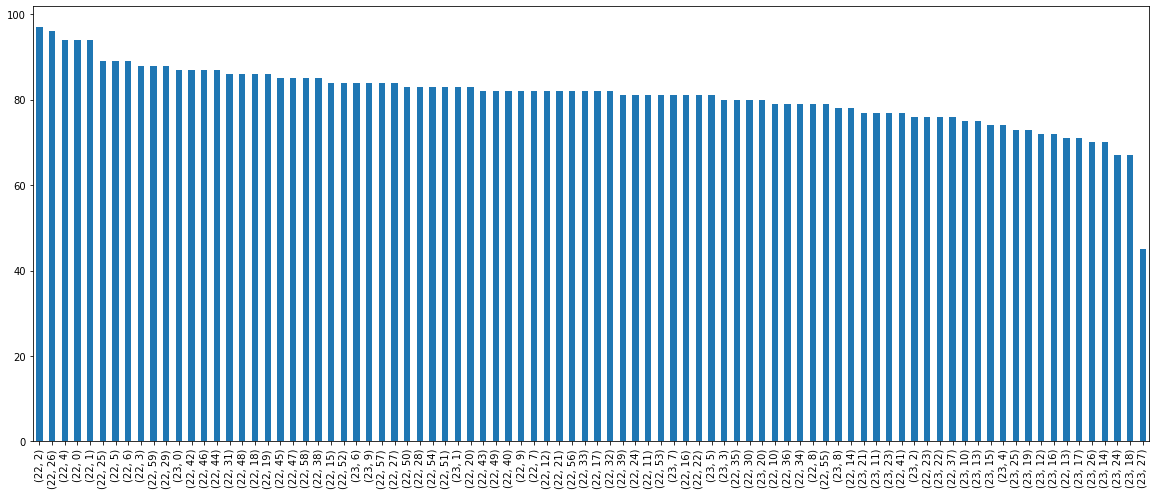

In [25]:
plt.figure(figsize=(20,8))
sample['min'].value_counts().plot(kind='bar')

In [26]:
#re.findall(r'user_\d+',sample['user_agent'][0])[0]
sample['user_id']=benign['user_agent'].apply(lambda x: re.findall(r'user_\d+',x)[0])

In [27]:
sample['browser_family']=sample['user_agent'].apply(lambda x:parse(x).browser.family)

In [28]:
sample['browser_version']=sample['user_agent'].apply(lambda x:parse(x).browser.version_string)

In [29]:
sample['os_family']=sample['user_agent'].apply(lambda x:parse(x).os.family)

In [30]:
sample['os_version']=sample['user_agent'].apply(lambda x:parse(x).os.version_string)

In [31]:
sample['device_family']=sample['user_agent'].apply(lambda x:parse(x).device.family)

In [32]:
sample['device_brand']=sample['user_agent'].apply(lambda x:parse(x).device.brand)

In [33]:
sample['device_model']=sample['user_agent'].apply(lambda x:parse(x).device.model)

In [34]:
sample['is_mobile']=sample['user_agent'].apply(lambda x:parse(x).is_mobile)

In [35]:
sample['is_tablet']=sample['user_agent'].apply(lambda x:parse(x).is_tablet)

In [36]:
sample['is_pc']=sample['user_agent'].apply(lambda x:parse(x).is_pc)

In [37]:
sample['is_touch_capable']=sample['user_agent'].apply(lambda x:parse(x).is_touch_capable)

In [38]:
sample['is_bot']=sample['user_agent'].apply(lambda x:parse(x).is_bot)

In [39]:
sample=pd.DataFrame(sample)

In [40]:
sample

,index,user_agent,timestamp,timestamp_obj,min,user_id,browser_family,browser_version,os_family,os_version,device_family,device_brand,device_model,is_mobile,is_tablet,is_pc,is_touch_capable,is_bot
0,4351,"[02/Aug/2011:22:00:15 -0700] ""user_353"" 0.0.0....",02/Aug/2011:22:00:15 -0700,2011-08-02 22:00:15,"(22, 0)",user_2,Opera Mobile,11.10,Symbian OS,,Generic Smartphone,Generic,Smartphone,True,False,False,False,False
1,13740,"[02/Aug/2011:22:00:44 -0700] ""user_242"" 0.0.0....",02/Aug/2011:22:00:44 -0700,2011-08-02 22:00:44,"(22, 0)",user_3,Firefox,5.0,Windows,7,Other,None,None,False,False,True,False,False
2,105,"[02/Aug/2011:22:00:00 -0700] ""user_107"" 0.0.0....",02/Aug/2011:22:00:00 -0700,2011-08-02 22:00:00,"(22, 0)",user_4,Firefox,5.0,Windows,XP,Other,None,None,False,False,True,False,False
3,5487,"[02/Aug/2011:22:00:19 -0700] ""user_489"" 0.0.0....",02/Aug/2011:22:00:19 -0700,2011-08-02 22:00:19,"(22, 0)",user_5,Firefox,3.6.8,Windows,XP,Other,None,None,False,False,True,False,False
4,2861,"[02/Aug/2011:22:00:10 -0700] ""user_363"" 0.0.0....",02/Aug/2011:22:00:10 -0700,2011-08-02 22:00:10,"(22, 0)",user_6,Other,,Other,,Other,None,None,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,1419533,"[02/Aug/2011:23:27:16 -0700] ""user_174"" 0.0.0....",02/Aug/2011:23:27:16 -0700,2011-08-02 23:27:16,"(23, 27)",user_119,Firefox,6.0,Windows,XP,Other,None,None,False,False,True,False,False
7118,1417352,"[02/Aug/2011:23:27:07 -0700] ""user_493"" 0.0.0....",02/Aug/2011:23:27:07 -0700,2011-08-02 23:27:07,"(23, 27)",user_120,IE,9.0,Windows,7,Other,None,None,False,False,True,False,False
7119,1422047,"[02/Aug/2011:23:27:28 -0700] ""user_188"" 0.0.0....",02/Aug/2011:23:27:28 -0700,2011-08-02 23:27:28,"(23, 27)",user_121,Firefox,5.0,Windows,XP,Other,None,None,False,False,True,False,False
7120,1422930,"[02/Aug/2011:23:27:32 -0700] ""user_71"" 0.0.0.0...",02/Aug/2011:23:27:32 -0700,2011-08-02 23:27:32,"(23, 27)",user_122,Firefox,5.0,Windows,XP,Other,None,None,False,False,True,False,False


In [41]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             7122 non-null   int64         
 1   user_agent        7122 non-null   object        
 2   timestamp         7122 non-null   object        
 3   timestamp_obj     7122 non-null   datetime64[ns]
 4   min               7122 non-null   object        
 5   user_id           7122 non-null   object        
 6   browser_family    7122 non-null   object        
 7   browser_version   7122 non-null   object        
 8   os_family         7122 non-null   object        
 9   os_version        7122 non-null   object        
 10  device_family     7122 non-null   object        
 11  device_brand      608 non-null    object        
 12  device_model      608 non-null    object        
 13  is_mobile         7122 non-null   bool          
 14  is_tablet         7122 n

In [42]:
sample['user_id'].value_counts().max(),sample['user_id'].value_counts().min(),sample['user_id'].value_counts().mean()

(15, 14, 14.244)

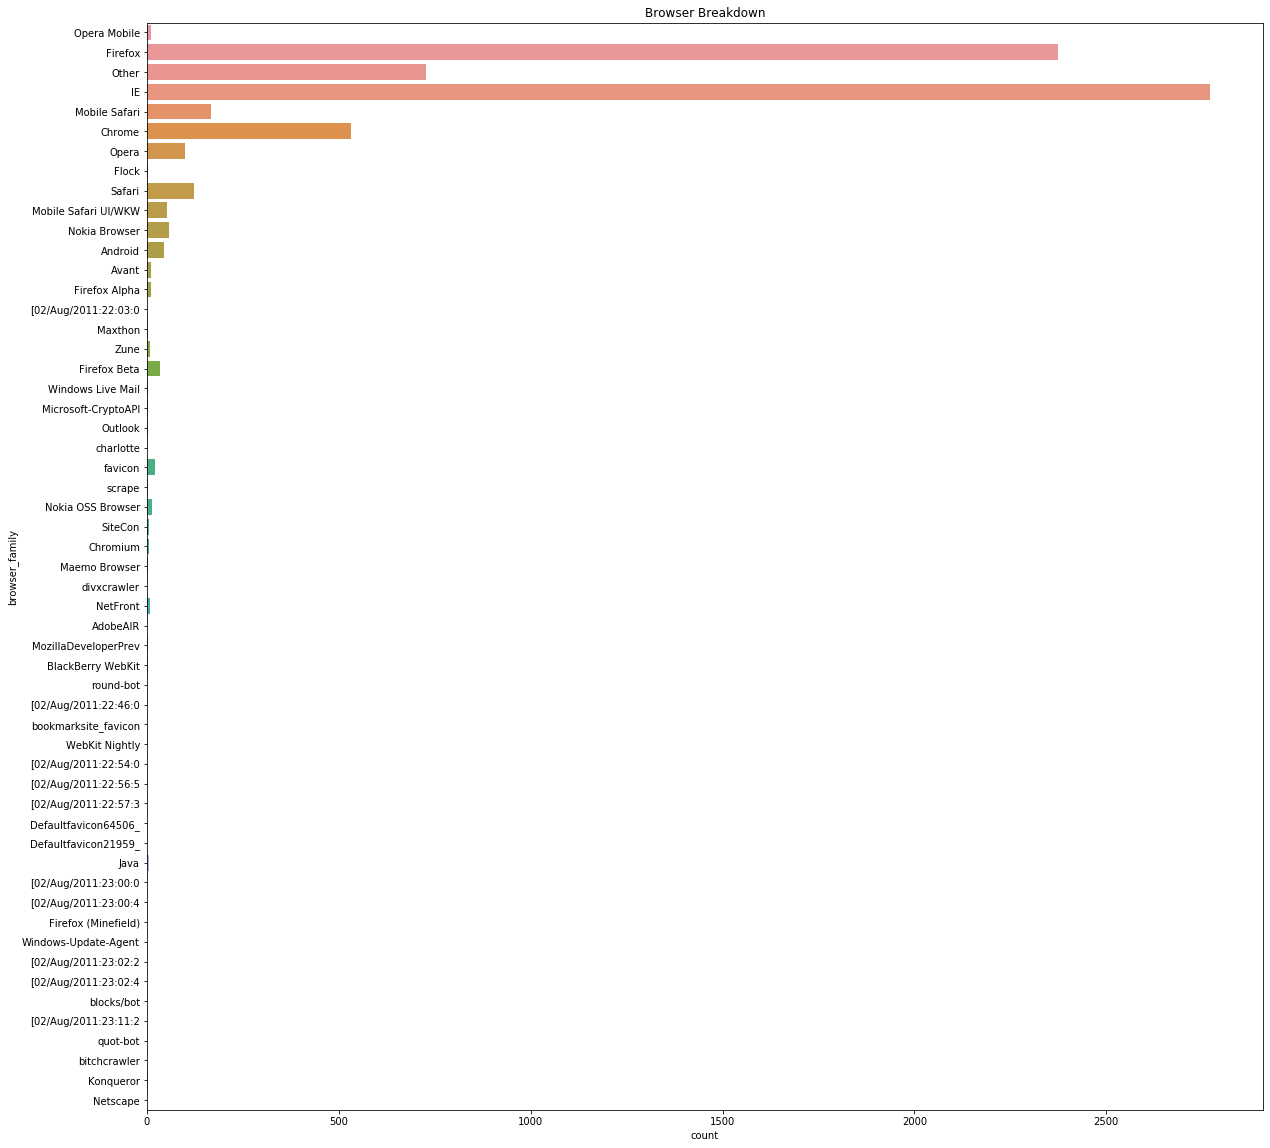

In [43]:
plt.figure(figsize=(20,20))
plt.title("Browser Breakdown")
ax=sns.countplot(y='browser_family',data=sample)
#labels=['\n'.join(wrap(l.get_text(),20)) for l in ax.get_yticklabels()]
labels=[l.get_text()[:20] for l in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.show()

In [44]:
browser_cnt=pd.DataFrame(sample['browser_family'].value_counts()).reset_index()
browser_cnt.columns=['browser_family','counts']
browser_cnt

,browser_family,counts
0,IE,2770
1,Firefox,2373
2,Other,726
3,Chrome,531
4,Mobile Safari,167
5,Safari,123
6,Opera,98
7,Nokia Browser,58
8,Mobile Safari UI/WKWebView,52
9,Android,45


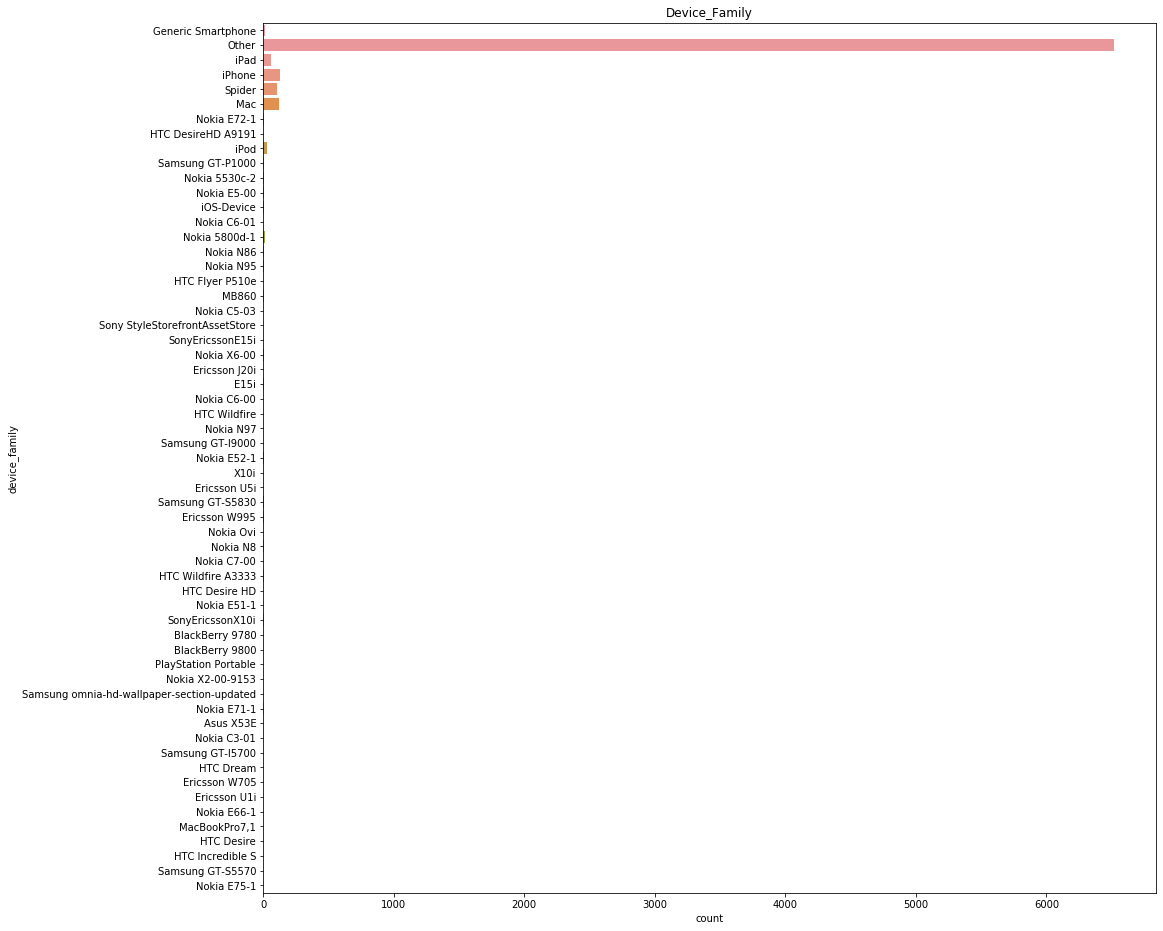

In [45]:
plt.figure(figsize=(16,16))
plt.title("Device_Family")
ax=sns.countplot(y='device_family', data=sample)

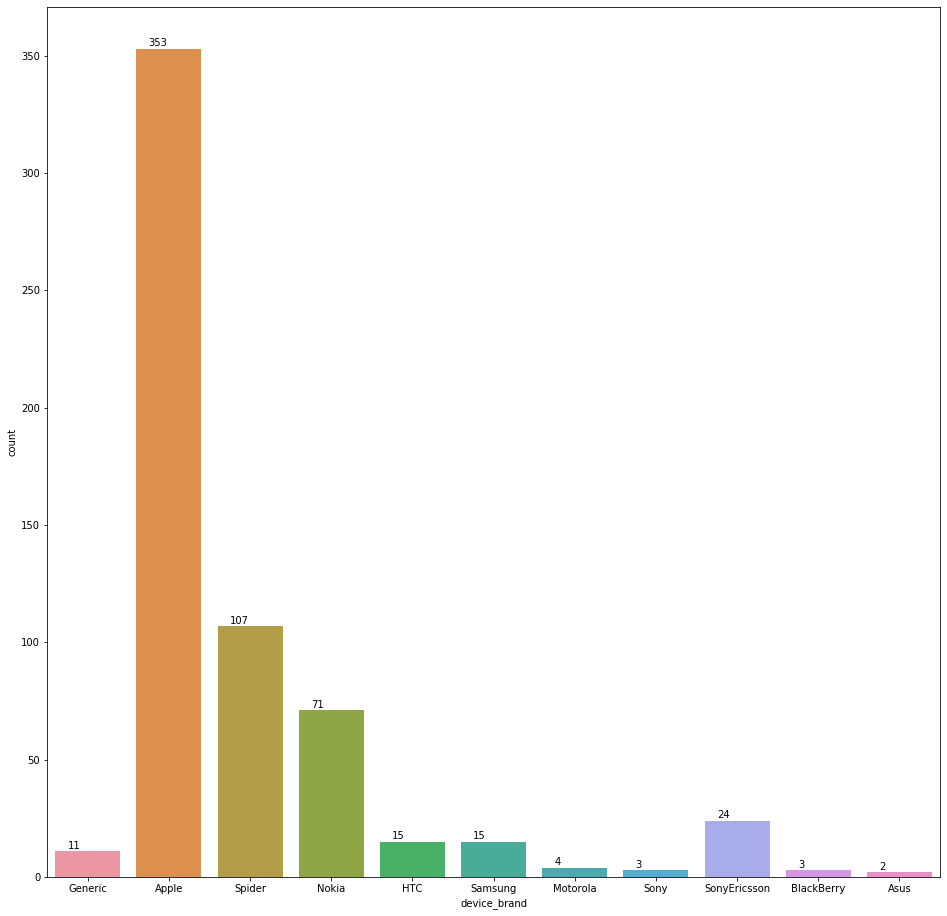

In [46]:
plt.figure(figsize=(16,16))
ax=sns.countplot(x='device_brand', data=sample)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


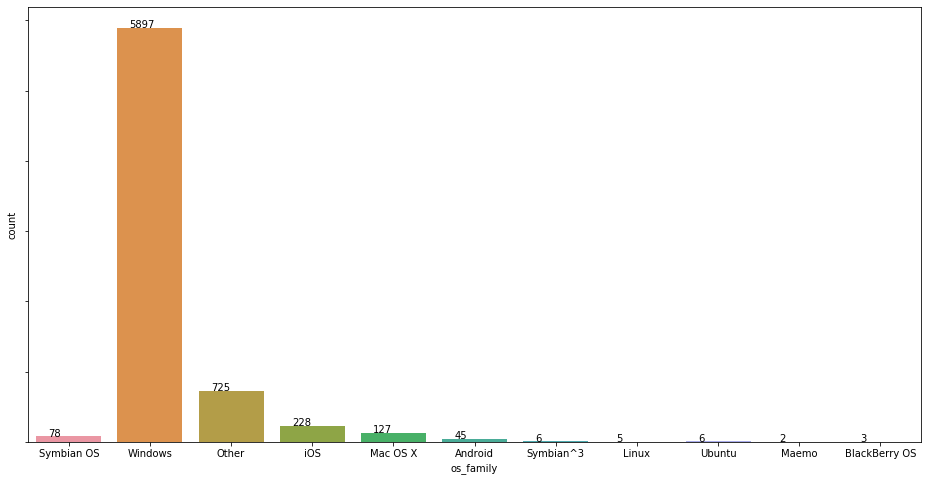

In [59]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x='os_family',data=sample)
#labels=['\n'.join(wrap(l.get_text(),20)) for l in ax.get_yticklabels()]
labels=[l.get_text()[:20] for l in ax.get_yticklabels()]
ax.set_yticklabels(labels)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

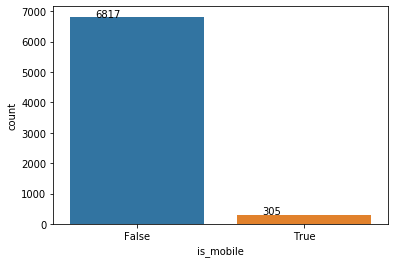

In [60]:
ax=sns.countplot(sample['is_mobile'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

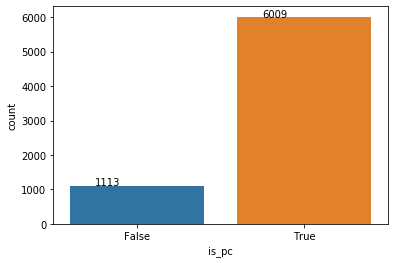

In [61]:
ax=sns.countplot(sample['is_pc'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

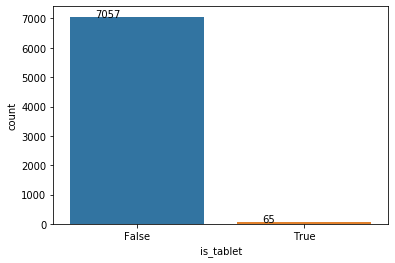

In [62]:
ax=sns.countplot(sample['is_tablet'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

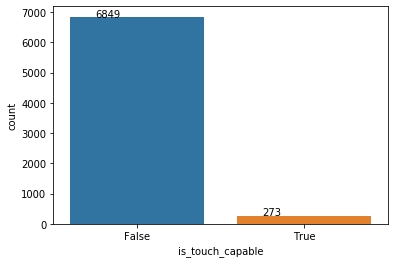

In [63]:
ax=sns.countplot(sample['is_touch_capable'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

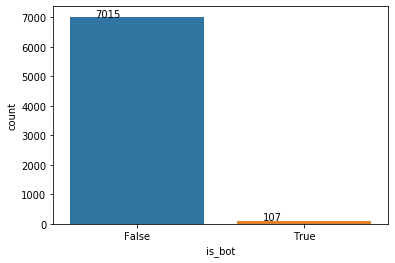

In [64]:
ax=sns.countplot(sample['is_bot'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

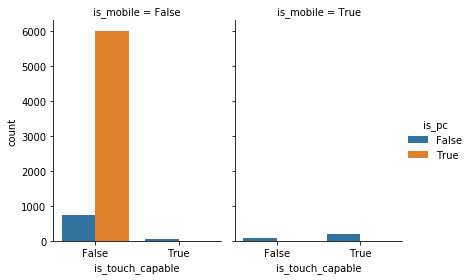

In [65]:
sns.catplot(x="is_touch_capable", hue="is_pc", col="is_mobile",
...                 data=sample, kind="count",
...                 height=4, aspect=.7);


In [71]:
sample_cln=sample.drop(['index','user_agent','timestamp','timestamp_obj','min','os_version','browser_version','device_family','device_brand','device_model','user_id'],axis=1)

In [72]:
sample_cln=pd.concat([sample_cln,pd.get_dummies(sample_cln['os_family'])],axis=1).drop(['os_family'],axis=1)
sample_cln=pd.concat([sample_cln,pd.get_dummies(sample_cln['browser_family'])],axis=1).drop(['browser_family'],axis=1)
#sample_cln=pd.concat([sample_cln,pd.get_dummies(sample_cln['is_mobile'],drop_first=True)],axis=1).drop(['is_mobile'],axis=1)

In [73]:
#os_enc=OneHotEncoder(handle_unknown='ignore',sparse=False)
#os_enc.fit(sample['os_family'].values.reshape(-1,1))

In [74]:
#os_enc.transform(sample['os_family'].values.reshape(-1,1))

In [75]:
X=sample_cln.values
clf = OneClassSVM(nu=0.005, kernel="rbf", gamma=0.1).fit(X)

In [76]:
result=clf.predict(X)

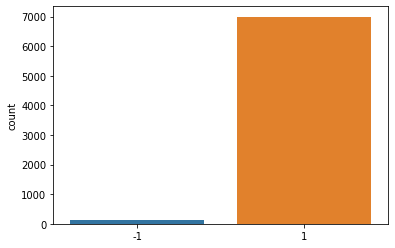

In [77]:
sns.countplot(result)

In [78]:
len(result[result==-1]),len(result[result==1])

(128, 6994)

In [79]:
clf.score_samples(X) 

array([20.48174308, 21.19159522, 21.19159522, ..., 21.19159522,
       21.19159522, 21.08513182])

In [80]:
result_df=pd.DataFrame(result)
result_df.columns=['result']

In [81]:
sample_cln=pd.concat([sample_cln,result_df],axis=1)

In [82]:
sample_cln

,is_mobile,is_tablet,is_pc,is_touch_capable,is_bot,Android,BlackBerry OS,Linux,Mac OS X,Maemo,...,bitchcrawler,blocks/bot,bookmarksite_favicon,charlotte,divxcrawler,favicon,quot-bot,round-bot,scrape,result
0,True,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,False,False,True,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,False,False,True,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,False,False,True,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,False,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,False,False,True,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7118,False,False,True,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7119,False,False,True,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7120,False,False,True,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


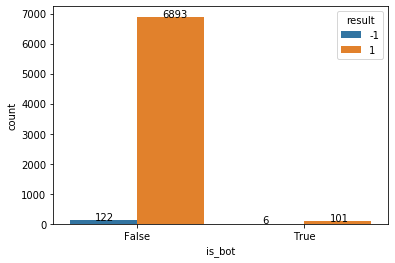

In [83]:
ax=sns.countplot(x='is_bot',hue='result',data=sample_cln)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

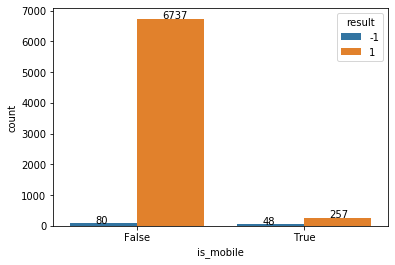

In [84]:
ax=sns.countplot(x='is_mobile',hue='result',data=sample_cln)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [85]:
sample_cln[result==-1]

,is_mobile,is_tablet,is_pc,is_touch_capable,is_bot,Android,BlackBerry OS,Linux,Mac OS X,Maemo,...,bitchcrawler,blocks/bot,bookmarksite_favicon,charlotte,divxcrawler,favicon,quot-bot,round-bot,scrape,result
0,True,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
6,False,True,False,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
59,True,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
332,False,True,False,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
340,False,True,False,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,False,True,False,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
7000,False,True,False,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
7022,False,True,False,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
7023,False,True,False,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


### Deployment code

In [162]:
train_columns=set(sample_cln.columns)-set('result')
train_columns_order=sample_cln.columns[:-1]
joblib.dump(train_columns,'train_columns.pkl')
joblib.dump(train_columns_order,'train_columns_order.pkl')
joblib.dump(clf,'clf.pkl')

['clf.pkl']

In [184]:
def predict(ua_str,clf,train_columns,trian_columns_order):
    benign=pd.DataFrame([ua_str])
    benign.columns=['user_agent']
    benign['timestamp']=benign['user_agent'].apply(lambda x: re.findall(r'^\[(.+?)\]',x)[0])
    benign['timestamp_obj']=benign['timestamp'].apply(lambda x:pd.to_datetime(x,format='%d/%b/%Y:%H:%M:%S -0700',errors='coerce'))
    benign['min']=benign['timestamp_obj'].apply(lambda x:(x.hour,x.minute))
    sample=benign
    sample['user_id']=benign['user_agent'].apply(lambda x: re.findall(r'user_\d+',x)[0])
    sample['browser_family']=sample['user_agent'].apply(lambda x:parse(x).browser.family)
    sample['browser_version']=sample['user_agent'].apply(lambda x:parse(x).browser.version_string)
    sample['os_family']=sample['user_agent'].apply(lambda x:parse(x).os.family)
    sample['os_version']=sample['user_agent'].apply(lambda x:parse(x).os.version_string)
    sample['device_family']=sample['user_agent'].apply(lambda x:parse(x).device.family)
    sample['device_brand']=sample['user_agent'].apply(lambda x:parse(x).device.brand)
    sample['device_model']=sample['user_agent'].apply(lambda x:parse(x).device.model)
    sample['is_mobile']=sample['user_agent'].apply(lambda x:parse(x).is_mobile)
    sample['is_tablet']=sample['user_agent'].apply(lambda x:parse(x).is_tablet)
    sample['is_pc']=sample['user_agent'].apply(lambda x:parse(x).is_pc)
    sample['is_touch_capable']=sample['user_agent'].apply(lambda x:parse(x).is_touch_capable)
    sample['is_bot']=sample['user_agent'].apply(lambda x:parse(x).is_bot)
    sample_cln=sample.drop(['user_agent','timestamp','timestamp_obj','min','os_version','browser_version','device_family','device_brand','device_model'],axis=1)
    sample_cln=pd.concat([sample_cln,pd.get_dummies(sample_cln['os_family'])],axis=1).drop(['os_family'],axis=1)
    sample_cln=pd.concat([sample_cln,pd.get_dummies(sample_cln['browser_family'])],axis=1).drop(['browser_family'],axis=1)

        
    # Get missing columns in the training test
    missing_cols = train_columns - set( sample_cln.columns )
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        sample_cln[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    sample_cln = sample_cln[train_columns_order]
    #print(sample_cln.columns)
    X=sample_cln.values
    result=clf.predict(X)
    
    if result==1:
        classification='benign'
    else:
        classification='non_benign'
    
    msg=sample['user_id'][0]+' is '+classification+' ***  Browser:'+sample['browser_family'][0]+'  Mobile:'+ ('yes' if sample['is_mobile'][0] else 'no')
    
    return msg
    
    
    

In [192]:
predict(sample['user_agent'][50],clf,train_columns,train_columns_order)

'user_186 is benign ***  Browser:Firefox  Mobile:no'

In [191]:
print(sample['user_agent'][50])

[02/Aug/2011:22:00:20 -0700] "user_186" 0.0.0.0 0.0.0.0  9080 304 TCP_HIT "GET http://www.mobilestan.net/forumdisplay.php?f=758/images/loading.gif HTTP/1.0" "unknown"  "low risk" "image/gif" 281 1037 "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:5.0) Gecko/20100101 Firefox/5.0" "www.mobilestan.net" "-" "0" "" "-"



In [187]:
a.ua_string

'[02/Aug/2011:22:00:00 -0700] "user_5" 0.0.0.0 0.0.0.0  9080 0 TCP_ERR_MISS "unknown -/ HTTP/1.0" "unknown"  "low risk" "-" 0 35 "-" "-" "-" "0" "" "-"\n'